STUDENT_FEEDBACK_ANALYSIS


In [2]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv.xlsx to student_feedback.csv (1).xlsx


In [3]:
import pandas as pd

df = pd.read_excel("/content/student_feedback.csv.xlsx")
df.head()  # Display first few rows



,S.no,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


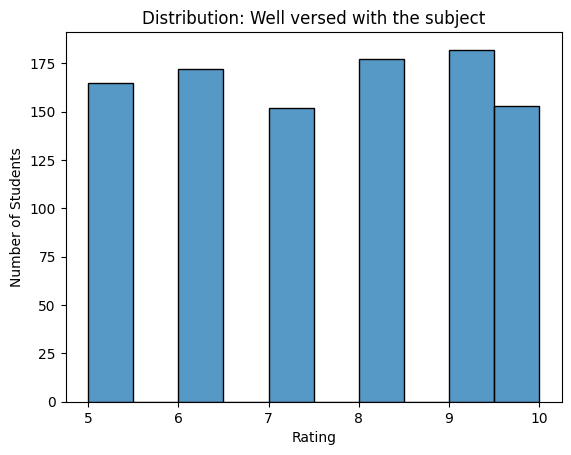

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Well versed with the subject"], bins=10, kde=False)
plt.title("Distribution: Well versed with the subject")
plt.xlabel("Rating")
plt.ylabel("Number of Students")
plt.show()


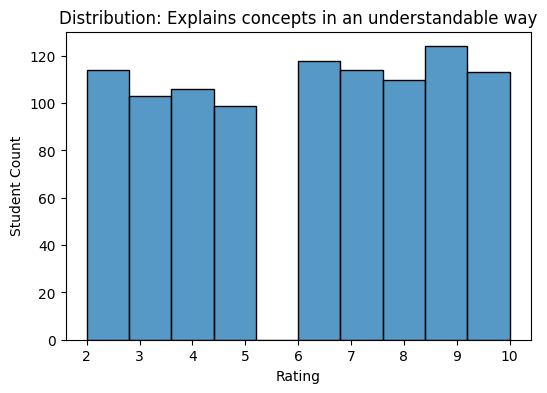

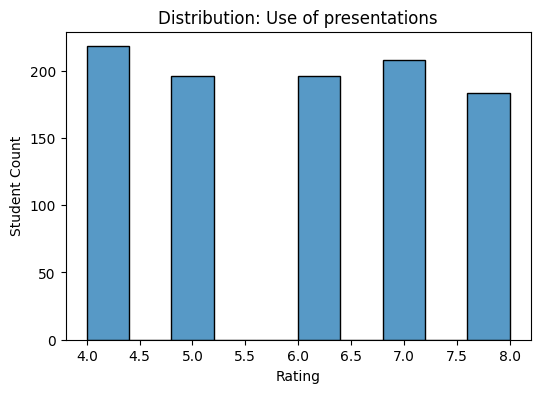

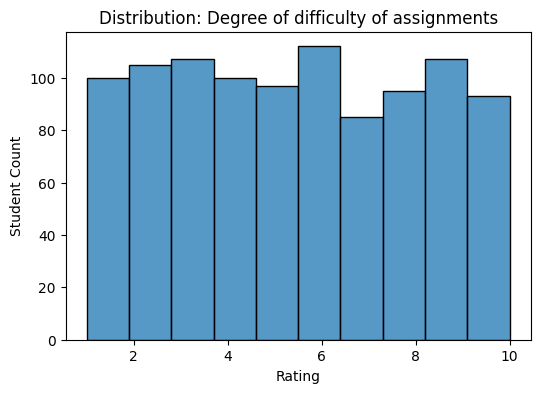

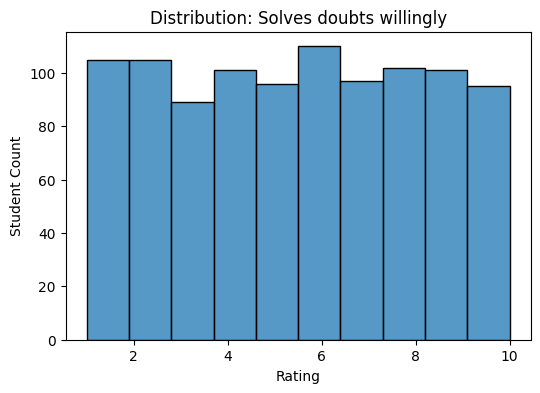

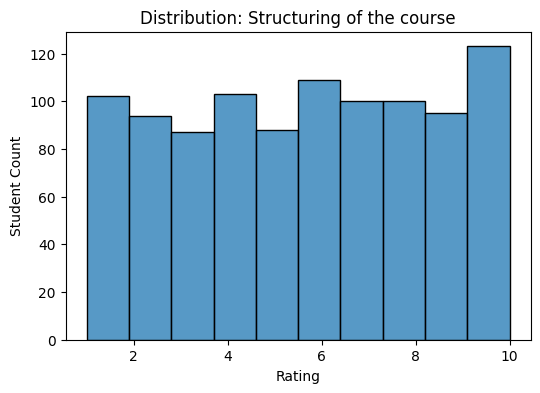

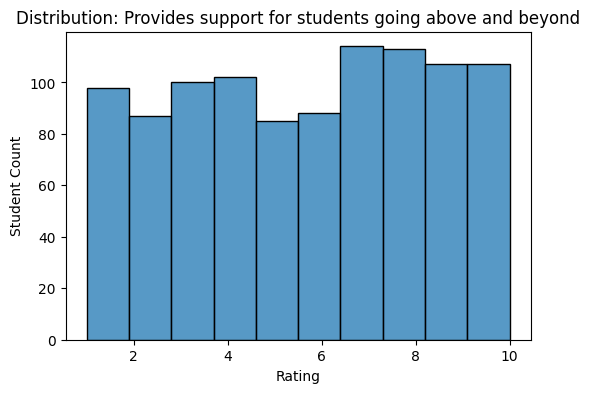

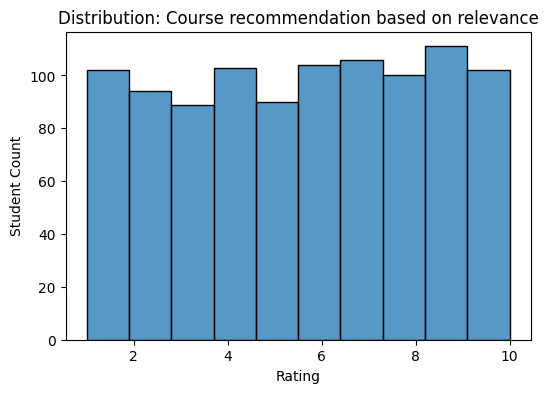

In [16]:
columns_to_plot = [
    "Explains concepts in an understandable way",
    "Use of presentations",
    "Degree of difficulty of assignments",
    "Solves doubts willingly",
    "Structuring of the course",
    "Provides support for students going above and beyond",
    "Course recommendation based on relevance"
]

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=10, kde=False)
    plt.title(f"Distribution: {col}")
    plt.xlabel("Rating")
    plt.ylabel("Student Count")
    plt.show()


In [4]:

base_suggestions = [
    "Very helpful and interactive session",
    "The class was too fast paced",
    "Great use of visuals",
    "More examples should be added",
    "Explain topics in a simpler way",
    "Assignments were challenging",
    "Include more practicals",
    "Helped clear my doubts clearly",
    "Too much theory, less engagement",
    "Loved the interactive session"
]

# Repeat and trim to match DataFrame length
suggestions = (base_suggestions * (len(df) // len(base_suggestions) + 1))[:len(df)]

# Add the column
df["Suggestions"] = suggestions


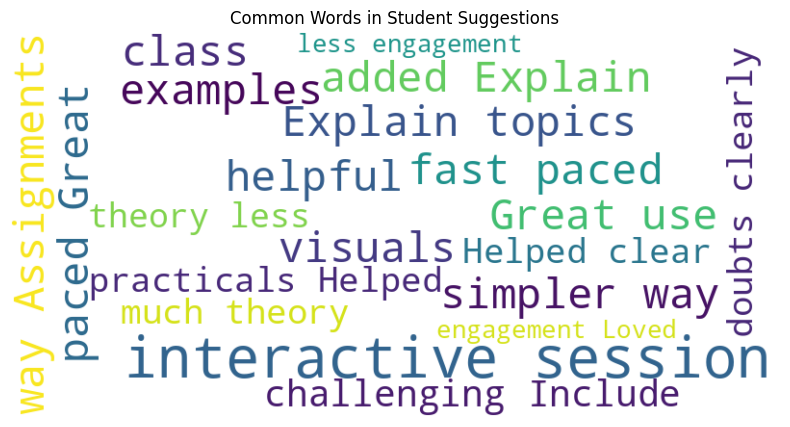

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = " ".join(str(comment) for comment in df["Suggestions"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Student Suggestions")
plt.show()


In [6]:
!pip install textblob


In [7]:
from textblob import TextBlob


In [8]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"


In [9]:
df["Sentiment"] = df["Suggestions"].apply(get_sentiment)


/tmp/ipython-input-10-3579061561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="pastel")


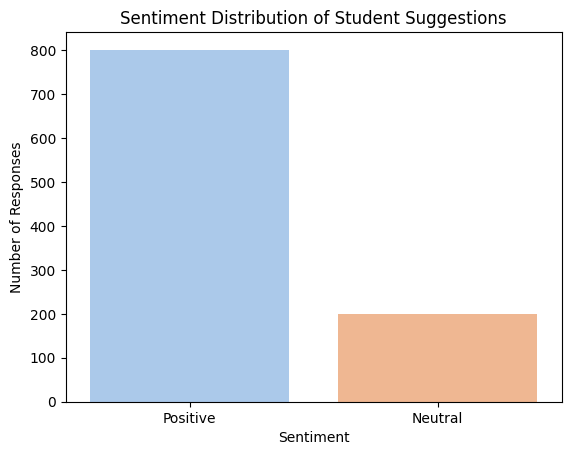

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=df, palette="pastel")
plt.title("Sentiment Distribution of Student Suggestions")
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")
plt.show()


In [12]:
avg_ratings = df.mean(numeric_only=True).sort_values(ascending=False)
avg_ratings


,0
S.no,500.000000
Student ID,500.000000
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


In [13]:
df["Sentiment"].value_counts(normalize=True) * 100


,proportion
Sentiment,
Positive,80.01998
Neutral,19.98002


In [14]:
df.to_csv("student_feedback_with_sentiment.csv", index=False)
